# Sketch Recognition Convolutional Neural Network (CNN)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten sketches by using a [quick-draw dataset](https://github.com/googlecreativelab/quickdraw-dataset).

![sketch_recognition_cnn.png](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/sketch_recognition_cnn.png?raw=1)

## Import dependencies

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
# %tensorflow_version 2.x

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import platform
import pathlib
import random

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.13
Tensorflow version: 2.11.0
Keras version: 2.11.0


In [3]:
cache_dir = 'tmp';

In [ ]:
# Create cache folder.
!mkdir tmp

mkdir: tmp: File exists


## Load dataset

In [4]:
# List all available datasets to see how the wikipedia dataset is called.
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [5]:
DATASET_NAME = 'quickdraw_bitmap'

dataset, dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir=cache_dir,
    with_info=True,
    split=tfds.Split.TRAIN,
)

## Explore dataset

In [6]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='quickdraw_bitmap',
    full_name='quickdraw_bitmap/3.0.0',
    description="""
    The Quick Draw Dataset is a collection of 50 million drawings across 345
    categories, contributed by players of the game Quick, Draw!. The bitmap dataset
    contains these drawings converted from vector format into 28x28 grayscale images
    """,
    homepage='https://github.com/googlecreativelab/quickdraw-dataset',
    data_path='tmp\\quickdraw_bitmap\\3.0.0',
    file_format=tfrecord,
    download_size=36.82 GiB,
    dataset_size=19.71 GiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=345),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=50426266, num_shards=256>,
    },
    citation="""@article{DBLP:journals/corr/HaE17,
      author    = {David Ha and
                   Douglas Eck},

In [7]:
image_shape = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes
num_examples = dataset_info.splits['train'].num_examples

print('num_examples: ', num_examples)
print('image_shape: ', image_shape)
print('num_classes: ', num_classes)

num_examples:  50426266
image_shape:  (28, 28, 1)
num_classes:  345


In [8]:
label_index_to_string = dataset_info.features['label'].int2str

classes = []

for class_index in range(num_classes):
    classes.append(label_index_to_string(class_index))
    
print('classes num:', len(classes))
print('classes:\n\n', classes)

classes num: 345
classes:

 ['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling fan', 'cell phone', 'cello', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise ship', 'cup', 'diamond', 'dishwasher', 'divin

In [9]:
print(dataset)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [10]:
fig = tfds.show_examples(dataset_info, dataset)

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


KeyboardInterrupt: 

In [11]:
def dataset_preview(dataset, image_shape, preview_images_num=100):
    num_cells = math.ceil(math.sqrt(preview_images_num))
    plt.figure(figsize=(17, 17))
    image_size = image_shape[0]
    
    for image_index, example in enumerate(dataset.take(preview_images_num)):
        image = example['image']
        label = example['label']
        
        class_index = label.numpy()
        class_name = classes[class_index]
        
        plt.subplot(num_cells, num_cells, image_index + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            np.reshape(image, (image_size, image_size)),
            cmap=plt.cm.binary
        )
        plt.xlabel('{} ({})'.format(class_name, class_index))
    plt.show()

In [12]:
def dataset_normalized_preview(dataset, image_shape, preview_images_num=100):
    num_cells = math.ceil(math.sqrt(preview_images_num))
    plt.figure(figsize=(17, 17))
    image_size = image_shape[0]
    
    for image_index, example in enumerate(dataset.take(preview_images_num)):
        image = example[0]
        label = tf.math.argmax(example[1])
        
        class_index = label.numpy()
        class_name = label_index_to_string(class_index)
        
        plt.subplot(num_cells, num_cells, image_index + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            np.reshape(image, (image_size, image_size)),
            cmap=plt.cm.binary
        )
        plt.xlabel('{} ({})'.format(class_name, class_index))
    plt.show()

In [17]:
import tensorflow as tf
from tensorflow import keras

from PIL import Image
import numpy as np
# Load pre-trained CNN model
model = keras.models.load_model('sbirCNN.h5')


In [20]:
class_mapping = {}
class_names = ['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling fan', 'cell phone', 'cello', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise ship', 'cup', 'diamond', 'dishwasher', 'diving board', 'dog', 'dolphin', 'donut', 'door', 'dragon', 'dresser', 'drill', 'drums', 'duck', 'dumbbell', 'ear', 'elbow', 'elephant', 'envelope', 'eraser', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fence', 'finger', 'fire hydrant', 'fireplace', 'firetruck', 'fish', 'flamingo', 'flashlight', 'flip flops', 'floor lamp', 'flower', 'flying saucer', 'foot', 'fork', 'frog', 'frying pan', 'garden hose', 'garden', 'giraffe', 'goatee', 'golf club', 'grapes', 'grass', 'guitar', 'hamburger', 'hammer', 'hand', 'harp', 'hat', 'headphones', 'hedgehog', 'helicopter', 'helmet', 'hexagon', 'hockey puck', 'hockey stick', 'horse', 'hospital', 'hot air balloon', 'hot dog', 'hot tub', 'hourglass', 'house plant', 'house', 'hurricane', 'ice cream', 'jacket', 'jail', 'kangaroo', 'key', 'keyboard', 'knee', 'knife', 'ladder', 'lantern', 'laptop', 'leaf', 'leg', 'light bulb', 'lighter', 'lighthouse', 'lightning', 'line', 'lion', 'lipstick', 'lobster', 'lollipop', 'mailbox', 'map', 'marker', 'matches', 'megaphone', 'mermaid', 'microphone', 'microwave', 'monkey', 'moon', 'mosquito', 'motorbike', 'mountain', 'mouse', 'moustache', 'mouth', 'mug', 'mushroom', 'nail', 'necklace', 'nose', 'ocean', 'octagon', 'octopus', 'onion', 'oven', 'owl', 'paint can', 'paintbrush', 'palm tree', 'panda', 'pants', 'paper clip', 'parachute', 'parrot', 'passport', 'peanut', 'pear', 'peas', 'pencil', 'penguin', 'piano', 'pickup truck', 'picture frame', 'pig', 'pillow', 'pineapple', 'pizza', 'pliers', 'police car', 'pond', 'pool', 'popsicle', 'postcard', 'potato', 'power outlet', 'purse', 'rabbit', 'raccoon', 'radio', 'rain', 'rainbow', 'rake', 'remote control', 'rhinoceros', 'rifle', 'river', 'roller coaster', 'rollerskates', 'sailboat', 'sandwich', 'saw', 'saxophone', 'school bus', 'scissors', 'scorpion', 'screwdriver', 'sea turtle', 'see saw', 'shark', 'sheep', 'shoe', 'shorts', 'shovel', 'sink', 'skateboard', 'skull', 'skyscraper', 'sleeping bag', 'smiley face', 'snail', 'snake', 'snorkel', 'snowflake', 'snowman', 'soccer ball', 'sock', 'speedboat', 'spider', 'spoon', 'spreadsheet', 'square', 'squiggle', 'squirrel', 'stairs', 'star', 'steak', 'stereo', 'stethoscope', 'stitches', 'stop sign', 'stove', 'strawberry', 'streetlight', 'string bean', 'submarine', 'suitcase', 'sun', 'swan', 'sweater', 'swing set', 'sword', 'syringe', 't-shirt', 'table', 'teapot', 'teddy-bear', 'telephone', 'television', 'tennis racquet', 'tent', 'The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa', 'tiger', 'toaster', 'toe', 'toilet', 'tooth', 'toothbrush', 'toothpaste', 'tornado', 'tractor', 'traffic light', 'train', 'tree', 'triangle', 'trombone', 'truck', 'trumpet', 'umbrella', 'underwear', 'van', 'vase', 'violin', 'washing machine', 'watermelon', 'waterslide', 'whale', 'wheel', 'windmill', 'wine bottle', 'wine glass', 'wristwatch', 'yoga', 'zebra', 'zigzag']

for i, class_name in enumerate(class_names):
    class_mapping[class_name] = i

print(class_mapping)

class_to_label = {}
for label, class_num in class_mapping.items():
    class_to_label[class_num] = f"{label}"

print(class_to_label)

{'aircraft carrier': 0, 'airplane': 1, 'alarm clock': 2, 'ambulance': 3, 'angel': 4, 'animal migration': 5, 'ant': 6, 'anvil': 7, 'apple': 8, 'arm': 9, 'asparagus': 10, 'axe': 11, 'backpack': 12, 'banana': 13, 'bandage': 14, 'barn': 15, 'baseball bat': 16, 'baseball': 17, 'basket': 18, 'basketball': 19, 'bat': 20, 'bathtub': 21, 'beach': 22, 'bear': 23, 'beard': 24, 'bed': 25, 'bee': 26, 'belt': 27, 'bench': 28, 'bicycle': 29, 'binoculars': 30, 'bird': 31, 'birthday cake': 32, 'blackberry': 33, 'blueberry': 34, 'book': 35, 'boomerang': 36, 'bottlecap': 37, 'bowtie': 38, 'bracelet': 39, 'brain': 40, 'bread': 41, 'bridge': 42, 'broccoli': 43, 'broom': 44, 'bucket': 45, 'bulldozer': 46, 'bus': 47, 'bush': 48, 'butterfly': 49, 'cactus': 50, 'cake': 51, 'calculator': 52, 'calendar': 53, 'camel': 54, 'camera': 55, 'camouflage': 56, 'campfire': 57, 'candle': 58, 'cannon': 59, 'canoe': 60, 'car': 61, 'carrot': 62, 'castle': 63, 'cat': 64, 'ceiling fan': 65, 'cell phone': 66, 'cello': 67, 'chai

In [36]:
def dataset_head(ds):
    for example in ds.take(20):
        image = example['image']
        label = example['label']

        class_index = label.numpy()
        class_name = label_index_to_string(class_index)
        #img_array = np.reshape(image, (28, 28, 1))
        tensor = tf.reshape(image, [1,28, 28, 1])
        #print(tensor)
        predict = model.predict(tensor)
        predicted_class_index = np.argmax(predict, axis=1)[0]

        # Map the predicted class index to the label
        predicted_label = class_to_label[predicted_class_index]

        print(predicted_label)
        print('{} ({})'.format(class_name, class_index), '\n')
        #print('Image shape: ', image.shape, '\n')
        #print(np.reshape(image.numpy(), (28, 28)), '\n')

In [ ]:
from PIL import Image
from PIL import ImageOps
from tensorflow.keras.preprocessing.image import  img_to_array,array_to_img
img = Image.open('plane.png')
# Convert image to numpy array
x = img_to_array(img)
x = preprocess_sketch(x,28,28)
print(x)
#img2 = array_to_img(x)
#print(array_to_img(x))
#print(img2)
#display(img2)
# Get prediction from 250 classes
preds = model.predict(x)
#classes = np.argmax(preds, axis=1)
#print(preds)
# Get the predicted class index
predicted_class_index = np.argmax(preds, axis=1)[0]

# Map the predicted class index to the label
predicted_label = class_to_label[predicted_class_index]

print(predicted_label)

In [37]:
dataset_head(dataset)

1/1 [==============================] - 0s 38ms/step
soccer ball
backpack (12) 

1/1 [==============================] - 0s 21ms/step
tornado
telephone (305) 

1/1 [==============================] - 0s 20ms/step
soccer ball
toaster (313) 

1/1 [==============================] - 0s 16ms/step
tornado
floor lamp (120) 

1/1 [==============================] - 0s 19ms/step
soccer ball
camera (55) 

1/1 [==============================] - 0s 17ms/step
soccer ball
broccoli (43) 

1/1 [==============================] - 0s 18ms/step
soccer ball
rain (238) 

1/1 [==============================] - 0s 17ms/step
panda
pants (209) 

1/1 [==============================] - 0s 16ms/step
panda
power outlet (233) 

1/1 [==============================] - 0s 15ms/step
dumbbell
oven (203) 

1/1 [==============================] - 0s 15ms/step
tornado
laptop (166) 

1/1 [==============================] - 0s 16ms/step
hammer
parrot (212) 

1/1 [==============================] - 0s 16ms/step
soccer ball
circle (71

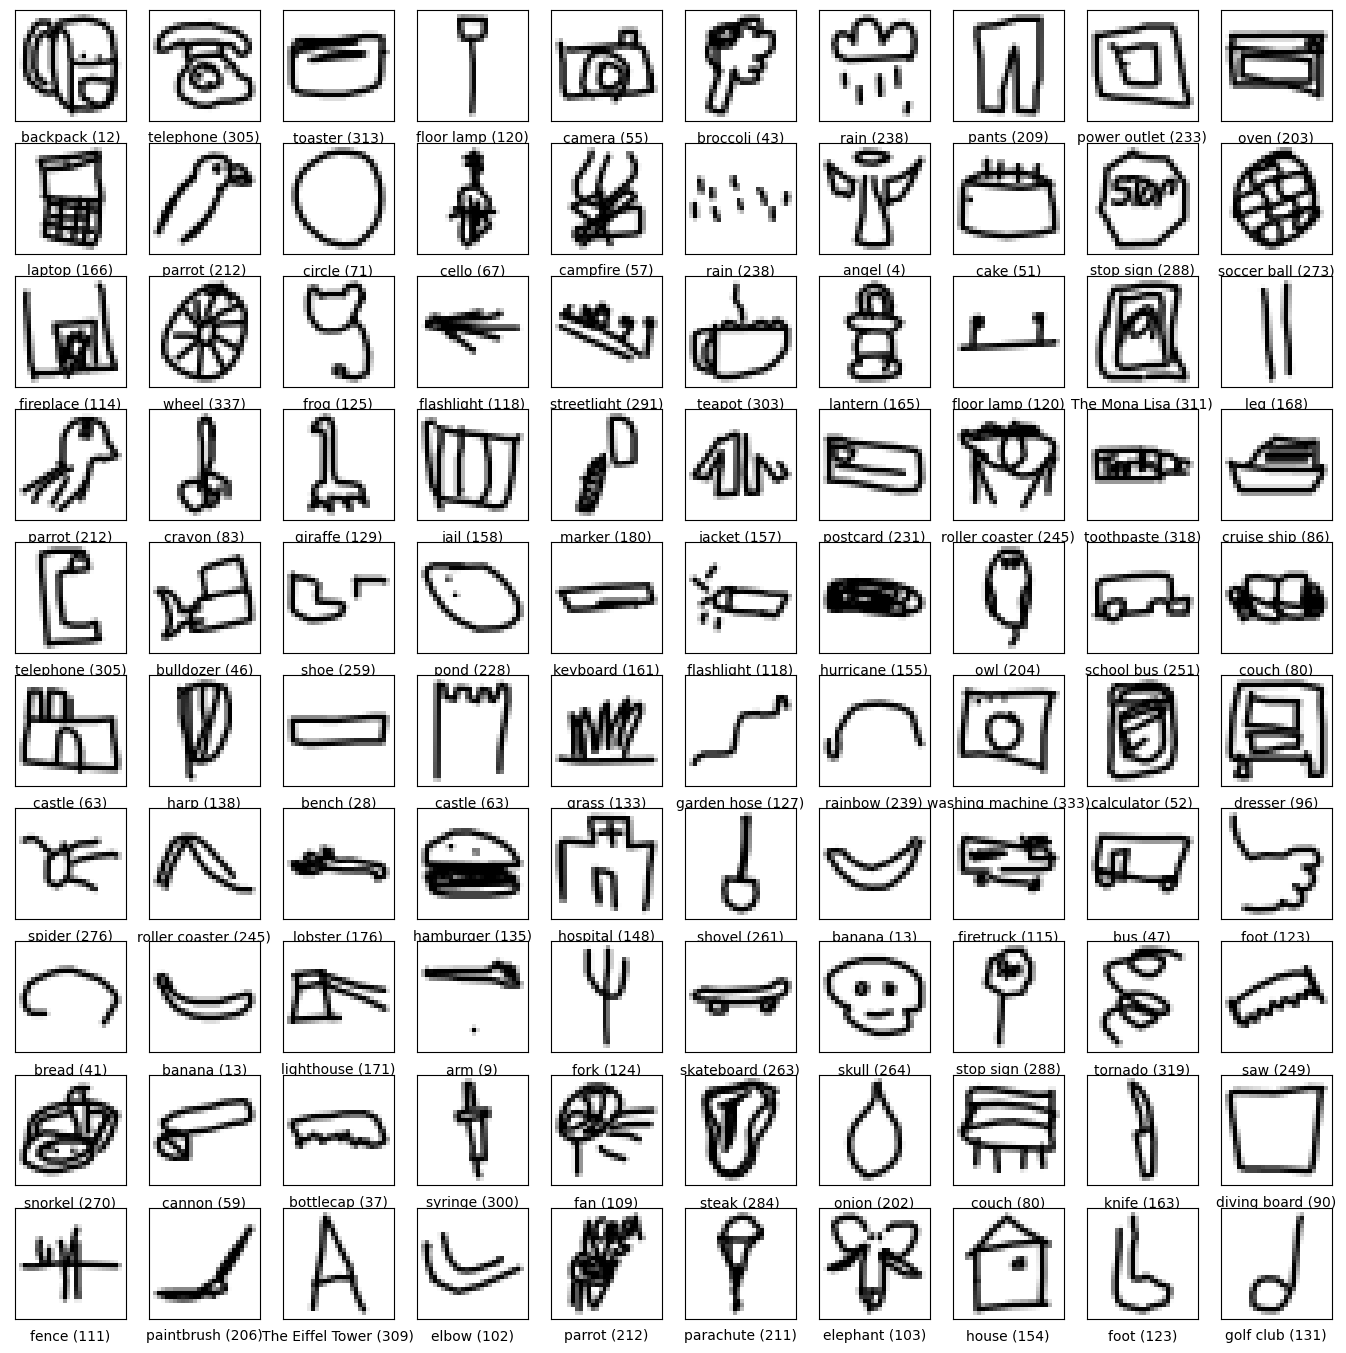

In [14]:
dataset_preview(dataset, image_shape)

## Normalize dataset

In [15]:
def normalize_example(example):
    image = example['image']
    label = example['label']
    label = tf.one_hot(label, len(classes))
    
    image = tf.math.divide(image, 255)
    
    return (image, label)

In [16]:
def augment_example(image, label):
    image = tf.image.random_flip_left_right(image)
    return (image, label)

In [17]:
dataset_normalized = dataset.map(normalize_example).map(augment_example)

In [1]:
for (image, label) in dataset_normalized.take(1):
    class_index = tf.math.argmax(label).numpy()
    class_name = label_index_to_string(class_index)

    print('{} ({})'.format(class_name, class_index), '\n')
    print(image)
    print('Image shape: ', image.shape, '\n')
    print(np.reshape(image.numpy(), (28, 28)), '\n')

NameError: name 'dataset_normalized' is not defined

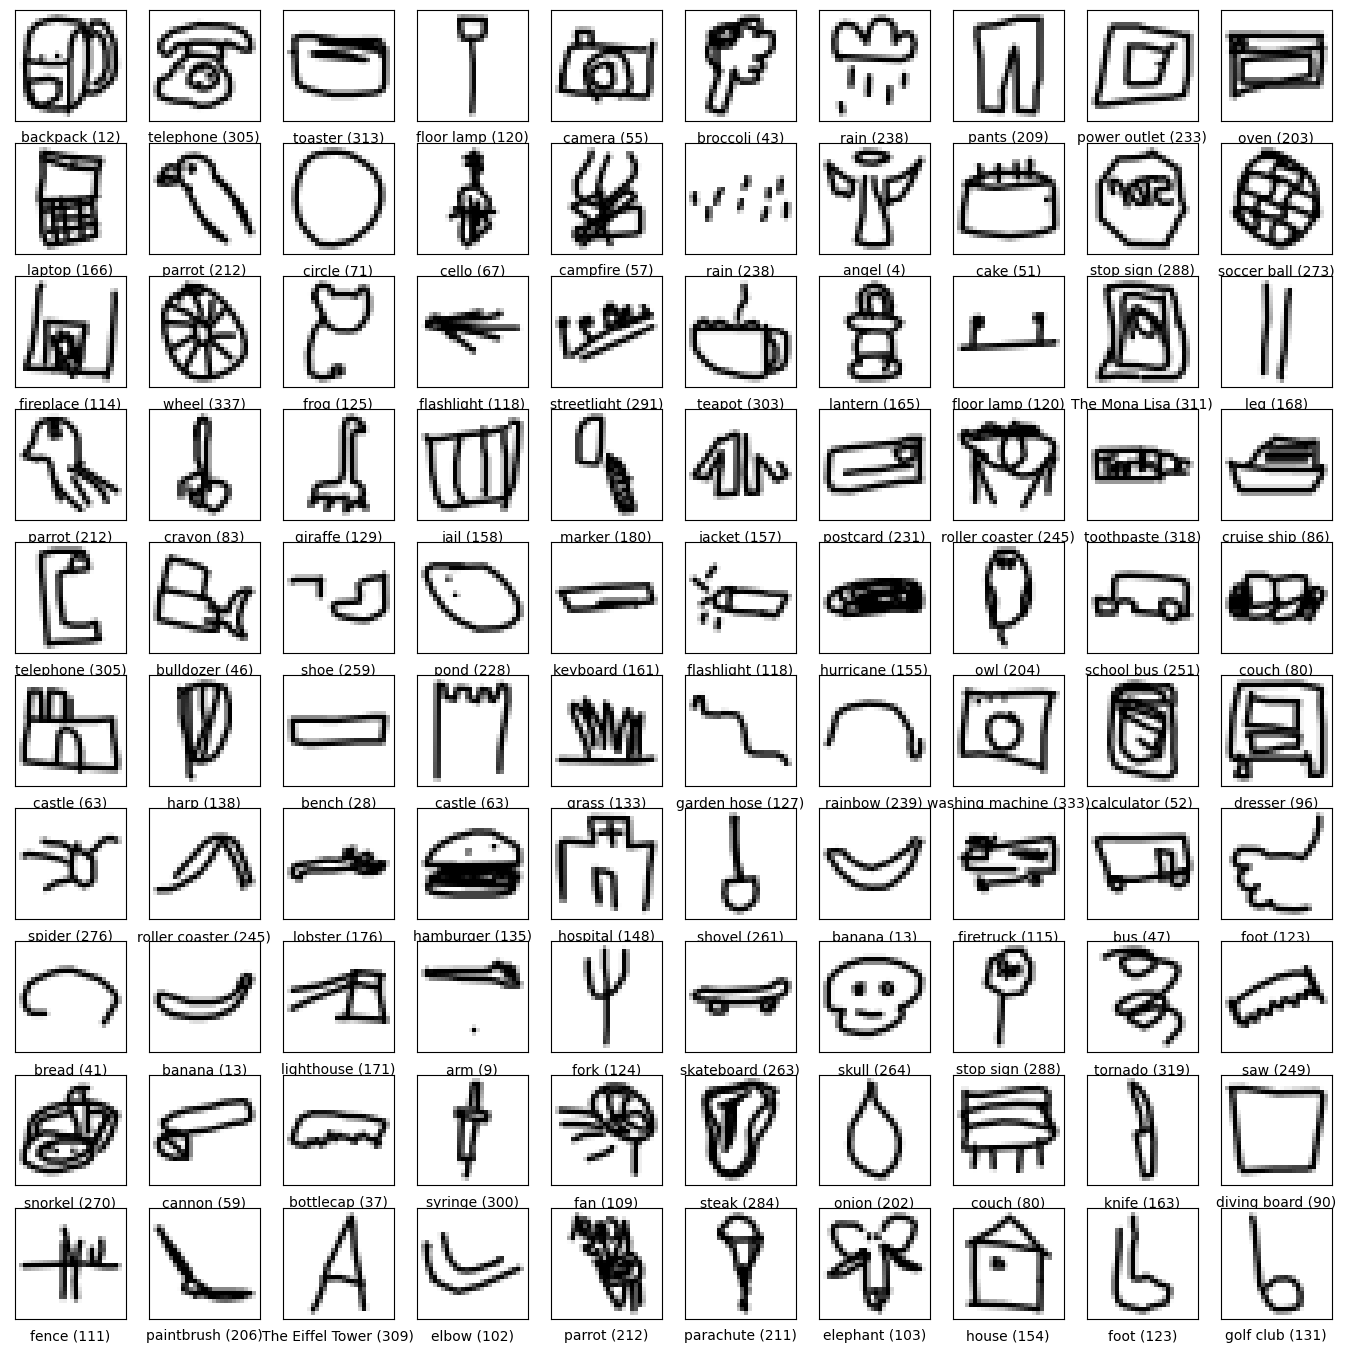

In [19]:
dataset_normalized_preview(dataset_normalized, image_shape)

## Prepare Train/Validation/Test dataset splits

In [20]:
# A quick example of how we're going to split the dataset for train/test/validation subsets.
tmp_ds = tf.data.Dataset.range(10)
print('tmp_ds:', list(tmp_ds.as_numpy_iterator()))

tmp_ds_test = tmp_ds.take(2)
print('tmp_ds_test:', list(tmp_ds_test.as_numpy_iterator()))

tmp_ds_val = tmp_ds.skip(2).take(3)
print('tmp_ds_val:', list(tmp_ds_val.as_numpy_iterator()))

tmp_ds_train = tmp_ds.skip(2 + 3)
print('tmp_ds_train:', list(tmp_ds_train.as_numpy_iterator()))

tmp_ds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
tmp_ds_test: [0, 1]
tmp_ds_val: [2, 3, 4]
tmp_ds_train: [5, 6, 7, 8, 9]


In [33]:
# Dataset split
test_dataset_batches = 1
val_dataset_batches = 1

# Dataset batching
batch_size = 2000
prefetch_buffer_batches = 10

# Training
epochs = 150
steps_per_epoch = 500

In [22]:
dataset_batched = dataset_normalized.batch(batch_size=batch_size)

In [23]:
# TEST dataset.
dataset_test = dataset_batched \
    .take(test_dataset_batches)

# VALIDATION dataset.
dataset_val = dataset_batched \
    .skip(test_dataset_batches) \
    .take(val_dataset_batches)

# TRAIN dataset.
dataset_train = dataset_batched \
    .skip(test_dataset_batches + val_dataset_batches) \
    .prefetch(buffer_size=prefetch_buffer_batches) \
    .repeat()

In [24]:
for (image_test, label_test) in dataset_test.take(1):
    print('label_test.shape: ', label_test.shape)
    print('image_test.shape: ', image_test.shape)
    
print()    
    
for (image_val, label_val) in dataset_val.take(1):
    print('label_val.shape: ', label_val.shape)
    print('image_val.shape: ', image_val.shape)    
    
print()    
    
for (image_train, label_train) in dataset_train.take(1):
    print('label_train.shape: ', label_train.shape)
    print('image_train.shape: ', image_train.shape)    

label_test.shape:  (2000, 345)
image_test.shape:  (2000, 28, 28, 1)

label_val.shape:  (2000, 345)
image_val.shape:  (2000, 28, 28, 1)

label_train.shape:  (2000, 345)
image_train.shape:  (2000, 28, 28, 1)


In [25]:
# Calculate how many times the network will "see" each class during one epoch of training
# given specific dataset (batches) and number of steps per epoch.
def get_dataset_classes_hist(dataset, classes, batches_num):
    mentions = {class_name: 0 for class_name in classes}
    for examples, labels in dataset.take(batches_num):
        for label in labels:
            class_name = classes[tf.math.argmax(label).numpy()]
            mentions[class_name] += 1    
    return mentions;

In [26]:
mentions = get_dataset_classes_hist(
    dataset_train,
    classes,
    batches_num=steps_per_epoch
)

KeyboardInterrupt: 

In [ ]:
for class_name in mentions:
    print('{:15s}: {}'.format(class_name, mentions[class_name]))

aircraft carrier: 2295
airplane       : 3030
alarm clock    : 2458
ambulance      : 2842
angel          : 2926
animal migration: 2706
ant            : 2548
anvil          : 2553
apple          : 2904
arm            : 2373
asparagus      : 3351
axe            : 2473
backpack       : 2429
banana         : 6052
bandage        : 2935
barn           : 2956
baseball bat   : 2381
baseball       : 2668
basket         : 2278
basketball     : 2662
bat            : 2371
bathtub        : 3429
beach          : 2515
bear           : 2679
beard          : 3318
bed            : 2346
bee            : 2417
belt           : 3876
bench          : 2531
bicycle        : 2501
binoculars     : 2432
bird           : 2619
birthday cake  : 3036
blackberry     : 2570
blueberry      : 2537
book           : 2389
boomerang      : 2918
bottlecap      : 3091
bowtie         : 2549
bracelet       : 2394
brain          : 2770
bread          : 2356
bridge         : 2638
broccoli       : 2613
broom          : 2347
bucket  

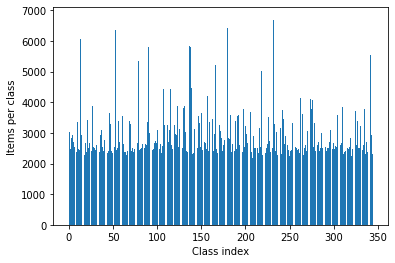

In [ ]:
mantions_x = [class_index for class_index, class_name in enumerate(classes)]
mantions_bars = [mentions[class_name] for class_name in mentions]

plt.bar(mantions_x, mantions_bars)
plt.xlabel('Class index')
plt.ylabel('Items per class')
plt.show()

## Create model

In [27]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=image_shape,
    kernel_size=5,
    filters=32,
    padding='same',
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=2,
    strides=2
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=32,
    padding='same',
    activation=tf.keras.activations.relu,
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=2,
    strides=2
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=64,
    padding='same',
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=2,
    strides=2
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dense(
    units=num_classes,
    activation=tf.keras.activations.softmax
))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [29]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
rms_prop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

## Train model

In [31]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_accuracy',
    restore_best_weights=True,
    verbose=1
)

In [34]:
training_history = model.fit(
    x=dataset_train,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=dataset_val,
    callbacks=[
        early_stopping_callback
    ]
)

Epoch 1/150
500/500 [==============================] - 325s 648ms/step - loss: 2.3541 - accuracy: 0.4640 - val_loss: 2.0002 - val_accuracy: 0.5325
Epoch 2/150
500/500 [==============================] - 316s 632ms/step - loss: 1.8818 - accuracy: 0.5573 - val_loss: 1.8157 - val_accuracy: 0.5685
Epoch 3/150
500/500 [==============================] - 317s 633ms/step - loss: 1.7344 - accuracy: 0.5891 - val_loss: 1.6811 - val_accuracy: 0.5895
Epoch 4/150
500/500 [==============================] - 316s 631ms/step - loss: 1.6503 - accuracy: 0.6060 - val_loss: 1.6242 - val_accuracy: 0.6050
Epoch 5/150
500/500 [==============================] - 314s 629ms/step - loss: 1.5974 - accuracy: 0.6178 - val_loss: 1.5947 - val_accuracy: 0.6230
Epoch 6/150
500/500 [==============================] - 314s 629ms/step - loss: 1.5582 - accuracy: 0.6254 - val_loss: 1.5136 - val_accuracy: 0.6330
Epoch 7/150
500/500 [==============================] - 317s 634ms/step - loss: 1.5312 - accuracy: 0.6318 - val_loss: 1

In [35]:
# Renders the charts for training accuracy and loss.
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

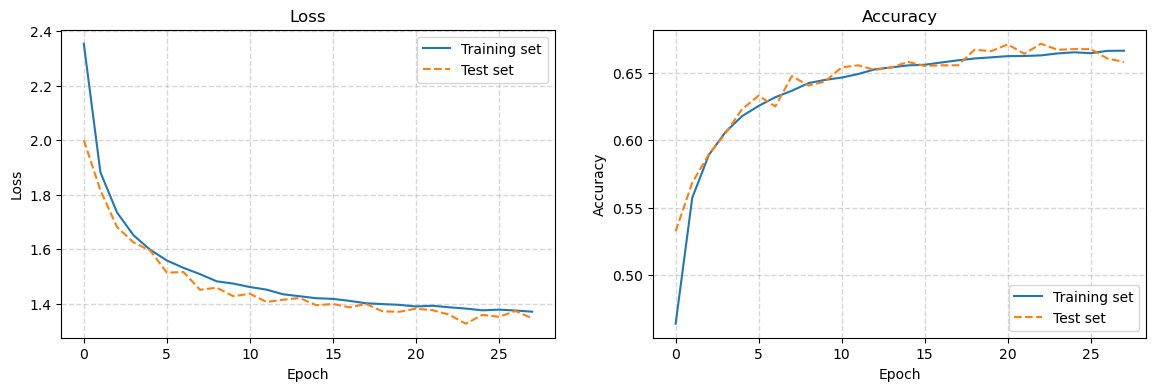

In [36]:
render_training_history(training_history)

## Evaluate model accuracy

### Training set accuracy

In [37]:
%%capture
train_loss, train_accuracy = model.evaluate(dataset_train.take(1))

In [38]:
print('Train loss: ', '{:.2f}'.format(train_loss))
print('Train accuracy: ', '{:.2f}'.format(train_accuracy))

Train loss:  1.35
Train accuracy:  0.68


### Validation set accuracy

In [39]:
%%capture
val_loss, val_accuracy = model.evaluate(dataset_val)

In [40]:
print('Validation loss: ', '{:.2f}'.format(val_loss))
print('Validation accuracy: ', '{:.2f}'.format(val_accuracy))

Validation loss:  1.36
Validation accuracy:  0.67


### Test set accuracy

In [41]:
%%capture
test_loss, test_accuracy = model.evaluate(dataset_test)

In [42]:
print('Test loss: ', '{:.2f}'.format(test_loss))
print('Test accuracy: ', '{:.2f}'.format(test_accuracy))

Test loss:  1.34
Test accuracy:  0.67


### Visualizing Predictions

In [70]:
def visualize_predictions(model, dataset):
    numbers_to_display = 256
    num_cells = math.ceil(math.sqrt(numbers_to_display))
    plt.figure(figsize=(15, 15))
    
    batch = dataset.take(1)
    print(batch)
    predictions = tf.math.argmax(model.predict(batch), axis=1).numpy()
    print(predictions)

    for x, y in batch:
        for image_index in range(numbers_to_display):
            pixels = np.reshape(x[image_index].numpy(), (28, 28))
            print(pixels)
            y_correct = tf.math.argmax(y[image_index]).numpy()
            y_predicted = predictions[image_index]
            print(y_predicted)
            correct_label = classes[y_correct]
            predicted_label = classes[y_predicted]
            
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            color_map = 'Greens' if y_correct == y_predicted else 'Reds'
            plt.subplot(num_cells, num_cells, image_index + 1)
            plt.imshow(pixels, cmap=color_map)
            #plt.xlabel(correct_label + ' --> ' + predicted_label)
            
    plt.subplots_adjust(hspace=1, wspace=0.8)
    plt.show()

<TakeDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 345), dtype=tf.float32, name=None))>
1/1 [==============================] - 1s 791ms/step
[107  15 305 ... 327  14 323]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.01960784
  0.06666667 0.06666667 0.00392157 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.0627451  0.49411765 0.92941177
  1.         1.         0.85882354 0.45882353 0.08235

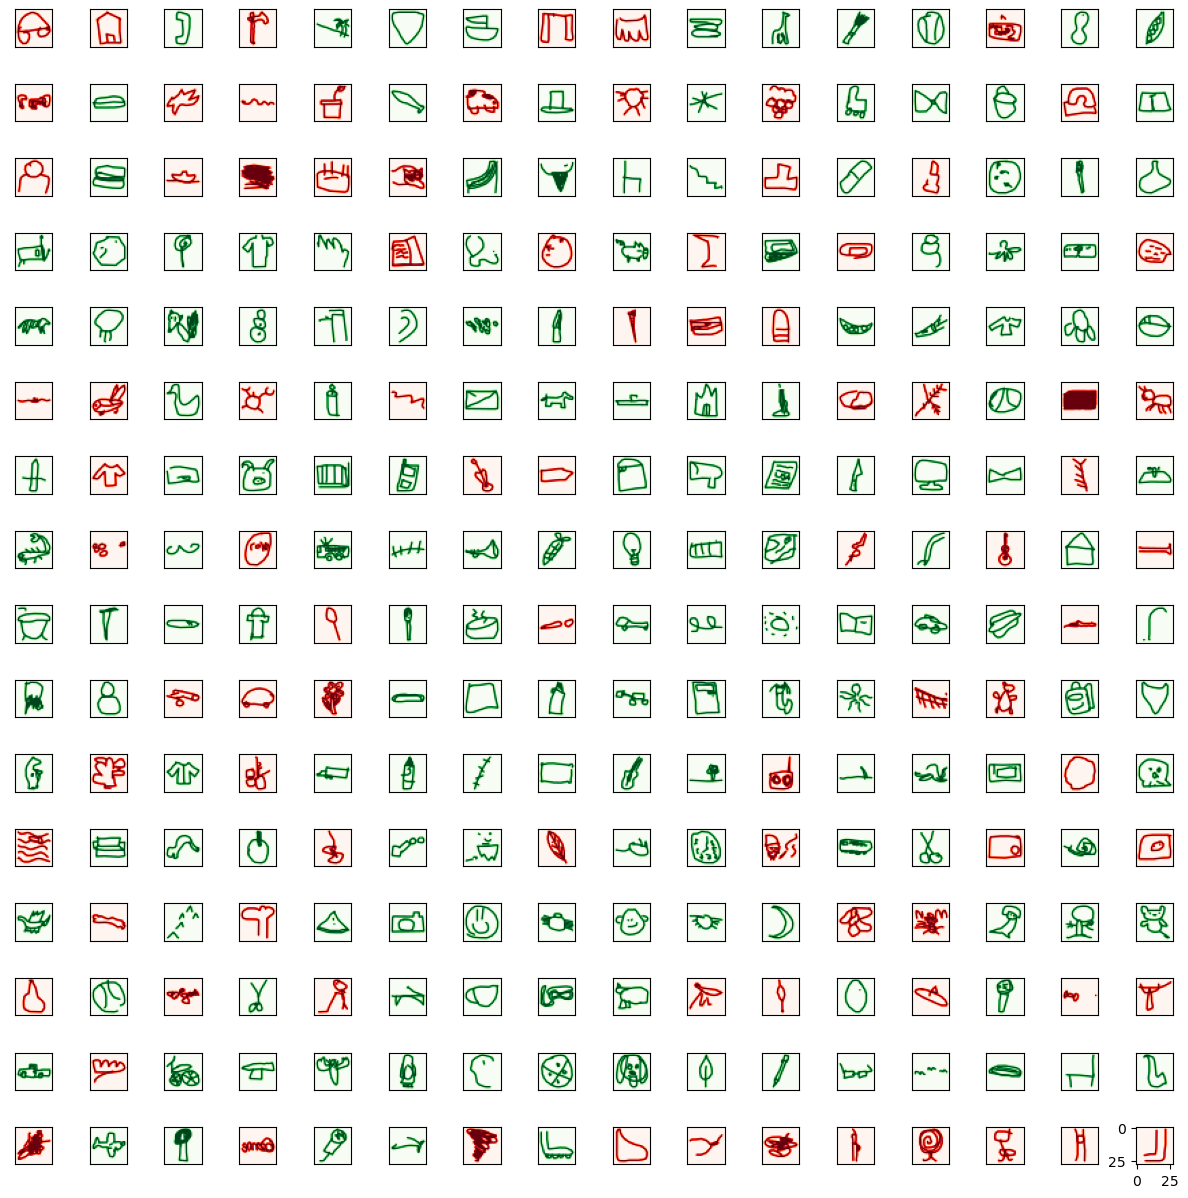

In [71]:
visualize_predictions(model, dataset_train)

1/1 [==============================] - 0s 451ms/step


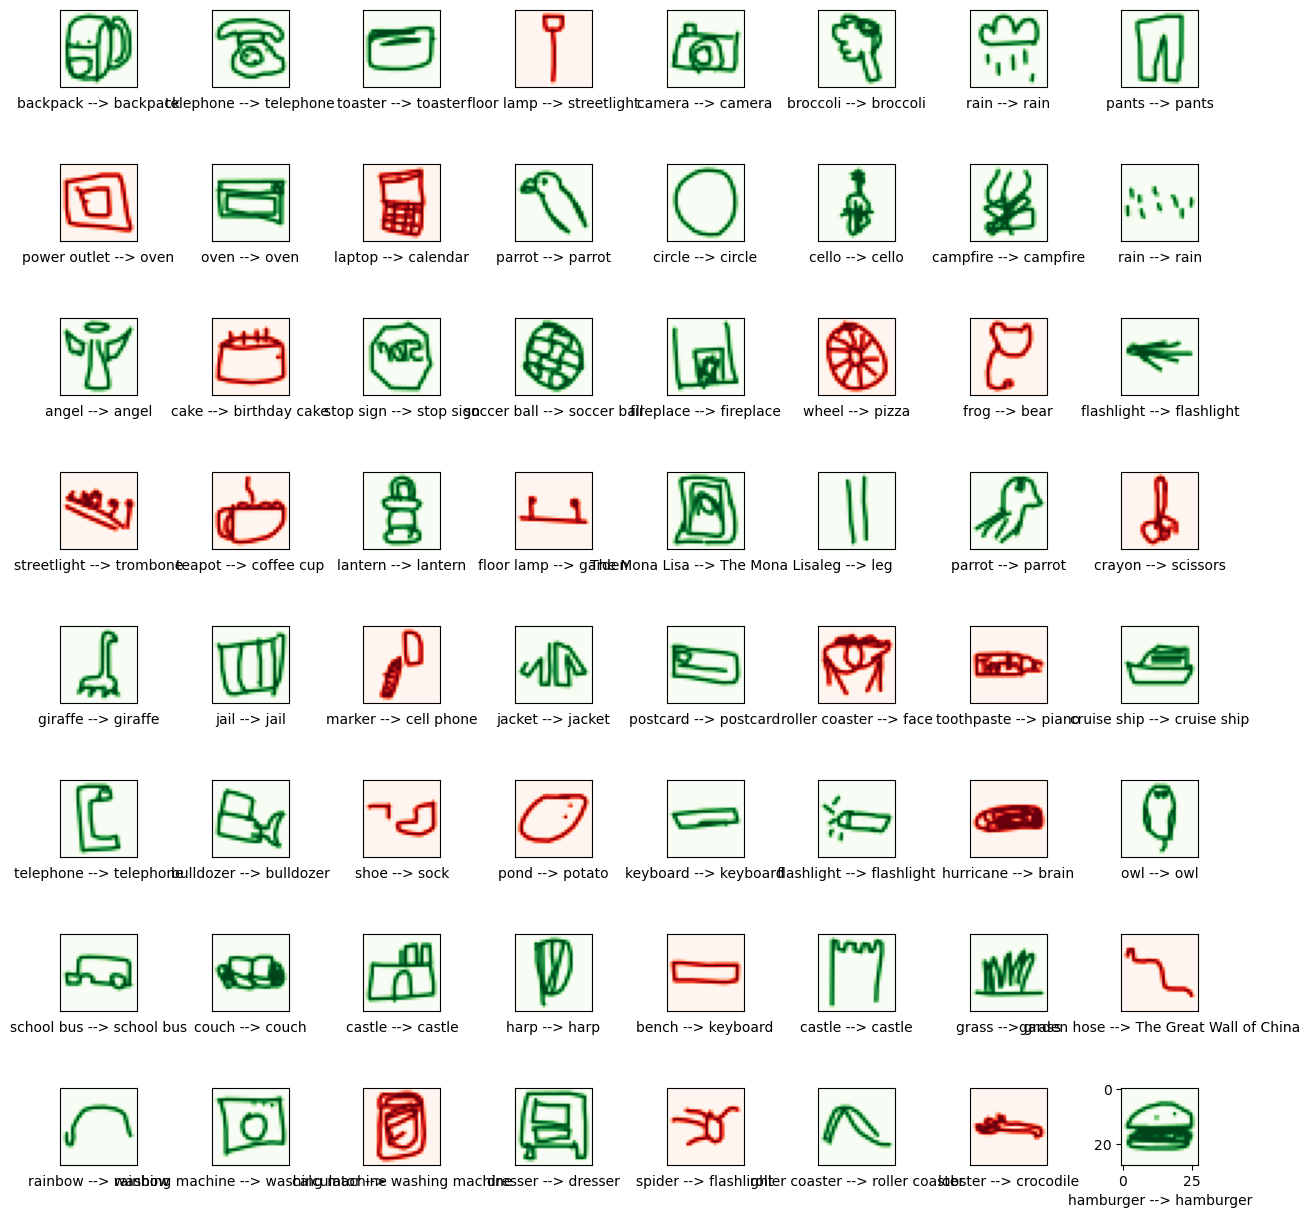

In [45]:
visualize_predictions(model, dataset_test)

In [66]:
class_mapping = {}
class_names = ['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling fan', 'cell phone', 'cello', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise ship', 'cup', 'diamond', 'dishwasher', 'diving board', 'dog', 'dolphin', 'donut', 'door', 'dragon', 'dresser', 'drill', 'drums', 'duck', 'dumbbell', 'ear', 'elbow', 'elephant', 'envelope', 'eraser', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fence', 'finger', 'fire hydrant', 'fireplace', 'firetruck', 'fish', 'flamingo', 'flashlight', 'flip flops', 'floor lamp', 'flower', 'flying saucer', 'foot', 'fork', 'frog', 'frying pan', 'garden hose', 'garden', 'giraffe', 'goatee', 'golf club', 'grapes', 'grass', 'guitar', 'hamburger', 'hammer', 'hand', 'harp', 'hat', 'headphones', 'hedgehog', 'helicopter', 'helmet', 'hexagon', 'hockey puck', 'hockey stick', 'horse', 'hospital', 'hot air balloon', 'hot dog', 'hot tub', 'hourglass', 'house plant', 'house', 'hurricane', 'ice cream', 'jacket', 'jail', 'kangaroo', 'key', 'keyboard', 'knee', 'knife', 'ladder', 'lantern', 'laptop', 'leaf', 'leg', 'light bulb', 'lighter', 'lighthouse', 'lightning', 'line', 'lion', 'lipstick', 'lobster', 'lollipop', 'mailbox', 'map', 'marker', 'matches', 'megaphone', 'mermaid', 'microphone', 'microwave', 'monkey', 'moon', 'mosquito', 'motorbike', 'mountain', 'mouse', 'moustache', 'mouth', 'mug', 'mushroom', 'nail', 'necklace', 'nose', 'ocean', 'octagon', 'octopus', 'onion', 'oven', 'owl', 'paint can', 'paintbrush', 'palm tree', 'panda', 'pants', 'paper clip', 'parachute', 'parrot', 'passport', 'peanut', 'pear', 'peas', 'pencil', 'penguin', 'piano', 'pickup truck', 'picture frame', 'pig', 'pillow', 'pineapple', 'pizza', 'pliers', 'police car', 'pond', 'pool', 'popsicle', 'postcard', 'potato', 'power outlet', 'purse', 'rabbit', 'raccoon', 'radio', 'rain', 'rainbow', 'rake', 'remote control', 'rhinoceros', 'rifle', 'river', 'roller coaster', 'rollerskates', 'sailboat', 'sandwich', 'saw', 'saxophone', 'school bus', 'scissors', 'scorpion', 'screwdriver', 'sea turtle', 'see saw', 'shark', 'sheep', 'shoe', 'shorts', 'shovel', 'sink', 'skateboard', 'skull', 'skyscraper', 'sleeping bag', 'smiley face', 'snail', 'snake', 'snorkel', 'snowflake', 'snowman', 'soccer ball', 'sock', 'speedboat', 'spider', 'spoon', 'spreadsheet', 'square', 'squiggle', 'squirrel', 'stairs', 'star', 'steak', 'stereo', 'stethoscope', 'stitches', 'stop sign', 'stove', 'strawberry', 'streetlight', 'string bean', 'submarine', 'suitcase', 'sun', 'swan', 'sweater', 'swing set', 'sword', 'syringe', 't-shirt', 'table', 'teapot', 'teddy-bear', 'telephone', 'television', 'tennis racquet', 'tent', 'The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa', 'tiger', 'toaster', 'toe', 'toilet', 'tooth', 'toothbrush', 'toothpaste', 'tornado', 'tractor', 'traffic light', 'train', 'tree', 'triangle', 'trombone', 'truck', 'trumpet', 'umbrella', 'underwear', 'van', 'vase', 'violin', 'washing machine', 'watermelon', 'waterslide', 'whale', 'wheel', 'windmill', 'wine bottle', 'wine glass', 'wristwatch', 'yoga', 'zebra', 'zigzag']

for i, class_name in enumerate(class_names):
    class_mapping[class_name] = i

print(class_mapping)

class_to_label = {}
for label, class_num in class_mapping.items():
    class_to_label[class_num] = f"{label}"

print(class_to_label)

{'aircraft carrier': 0, 'airplane': 1, 'alarm clock': 2, 'ambulance': 3, 'angel': 4, 'animal migration': 5, 'ant': 6, 'anvil': 7, 'apple': 8, 'arm': 9, 'asparagus': 10, 'axe': 11, 'backpack': 12, 'banana': 13, 'bandage': 14, 'barn': 15, 'baseball bat': 16, 'baseball': 17, 'basket': 18, 'basketball': 19, 'bat': 20, 'bathtub': 21, 'beach': 22, 'bear': 23, 'beard': 24, 'bed': 25, 'bee': 26, 'belt': 27, 'bench': 28, 'bicycle': 29, 'binoculars': 30, 'bird': 31, 'birthday cake': 32, 'blackberry': 33, 'blueberry': 34, 'book': 35, 'boomerang': 36, 'bottlecap': 37, 'bowtie': 38, 'bracelet': 39, 'brain': 40, 'bread': 41, 'bridge': 42, 'broccoli': 43, 'broom': 44, 'bucket': 45, 'bulldozer': 46, 'bus': 47, 'bush': 48, 'butterfly': 49, 'cactus': 50, 'cake': 51, 'calculator': 52, 'calendar': 53, 'camel': 54, 'camera': 55, 'camouflage': 56, 'campfire': 57, 'candle': 58, 'cannon': 59, 'canoe': 60, 'car': 61, 'carrot': 62, 'castle': 63, 'cat': 64, 'ceiling fan': 65, 'cell phone': 66, 'cello': 67, 'chai

In [1]:
from PIL import Image
from PIL import ImageOps
from tensorflow.keras.preprocessing.image import  img_to_array
img = Image.open('1---car.png').convert('L')
img = img.resize((28, 28))
display(img)
img = ImageOps.invert(img)
display(img)
# Convert image to numpy array
x = img_to_array(img)

x = x / 255.0  # Normalize pixel values between 0 and 1
x = np.expand_dims(x, axis=0)
print(x)
# Get prediction from 250 classes
preds = model.predict(x)
#classes = np.argmax(preds, axis=1)
#print(preds)
# Get the predicted class index
predicted_class_index = np.argmax(preds, axis=1)[0]
print(predicted_class_index)
# Map the predicted class index to the label
predicted_label = class_to_label[predicted_class_index]

print(predicted_label)

KeyboardInterrupt: 

## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [59]:
model_name = 'sbirCNN1.h5'
model.save(model_name, save_format='h5')

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/sketch_recognition_cnn/sketch_recognition_cnn.h5 \
  ./demos/public/models/sketch_recognition_cnn
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.